### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

import scipy.stats as stats
import statsmodels.api as sm

# Anomaly Detection
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("data.csv")

# Data Exploration

In [3]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [4]:
df.head().T

,0,1,2,3,4
Income,44637.249636,26858.596592,50367.605084,101455.600247,24875.283548
Age,49,34,35,21,52
Dependents,0,2,1,0,4
Occupation,Self_Employed,Retired,Student,Self_Employed,Professional
City_Tier,Tier_1,Tier_2,Tier_3,Tier_3,Tier_2
Rent,13391.174891,5371.719318,7555.140763,15218.340037,4975.05671
Loan_Repayment,0.0,0.0,4612.103386,6809.441427,3112.609398
Insurance,2206.490129,869.522617,2201.80005,4889.418087,635.90717
Groceries,6658.768341,2818.44446,6313.222081,14690.149363,3034.329665
Transport,2636.970696,1543.018778,3221.396403,7106.130005,1276.155163


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,20000.0,41585.496104,40014.540538,1301.187333,17604.875957,30185.383480,51765.446460,1.079728e+06
Age,20000.0,41.031450,13.578725,18.000000,29.000000,41.000000,53.000000,6.400000e+01
Dependents,20000.0,1.995950,1.417616,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Rent,20000.0,9115.494629,9254.228188,235.365692,3649.422246,6402.751824,11263.940492,2.159457e+05
Loan_Repayment,20000.0,2049.800292,4281.789941,0.000000,0.000000,0.000000,2627.142320,1.230807e+05
Insurance,20000.0,1455.028761,1492.938435,30.002012,580.204749,1017.124681,1787.160895,3.873493e+04
Groceries,20000.0,5205.667493,5035.953689,154.078240,2165.426419,3741.091535,6470.892718,1.198169e+05
Transport,20000.0,2704.466685,2666.345648,81.228584,1124.578012,1933.845509,3360.597508,8.186150e+04
Eating_Out,20000.0,1461.856982,1481.660811,39.437523,581.011801,1029.109726,1807.075251,3.440610e+04
Entertainment,20000.0,1448.853658,1489.019270,45.421469,581.632906,1020.198376,1790.104082,3.866737e+04


# Univariate Analysis

## Income Distribution

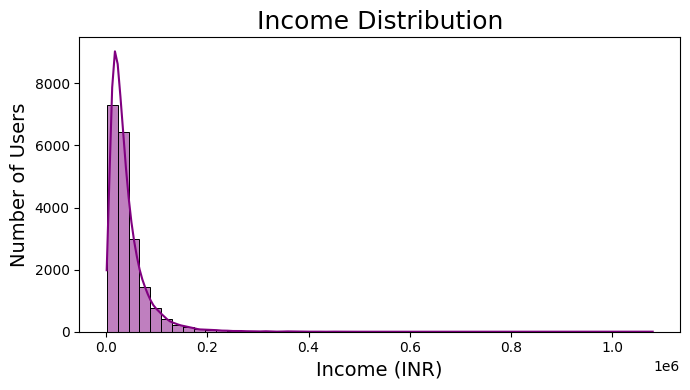

In [18]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Income'], bins=50, kde=True, color='purple')
plt.title('Income Distribution', fontsize=18)
plt.xlabel('Income (INR)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

## Age Distribution

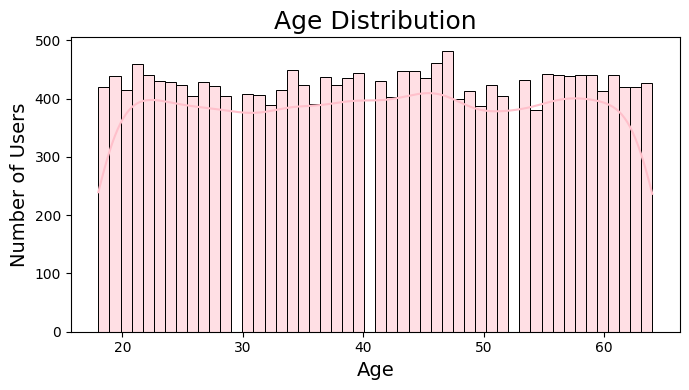

In [20]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Age'], bins=50, kde=True, color='pink')
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

## City Tier Distribution

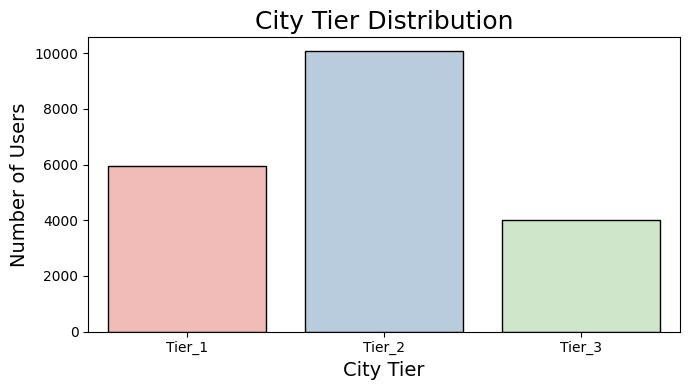

In [24]:
plt.figure(figsize=(7, 4))
sns.countplot(x='City_Tier', data=df, palette='Pastel1', edgecolor='black')
plt.title('City Tier Distribution', fontsize=18)
plt.xlabel('City Tier', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

# Expense Analysis

## Fixed Expenses

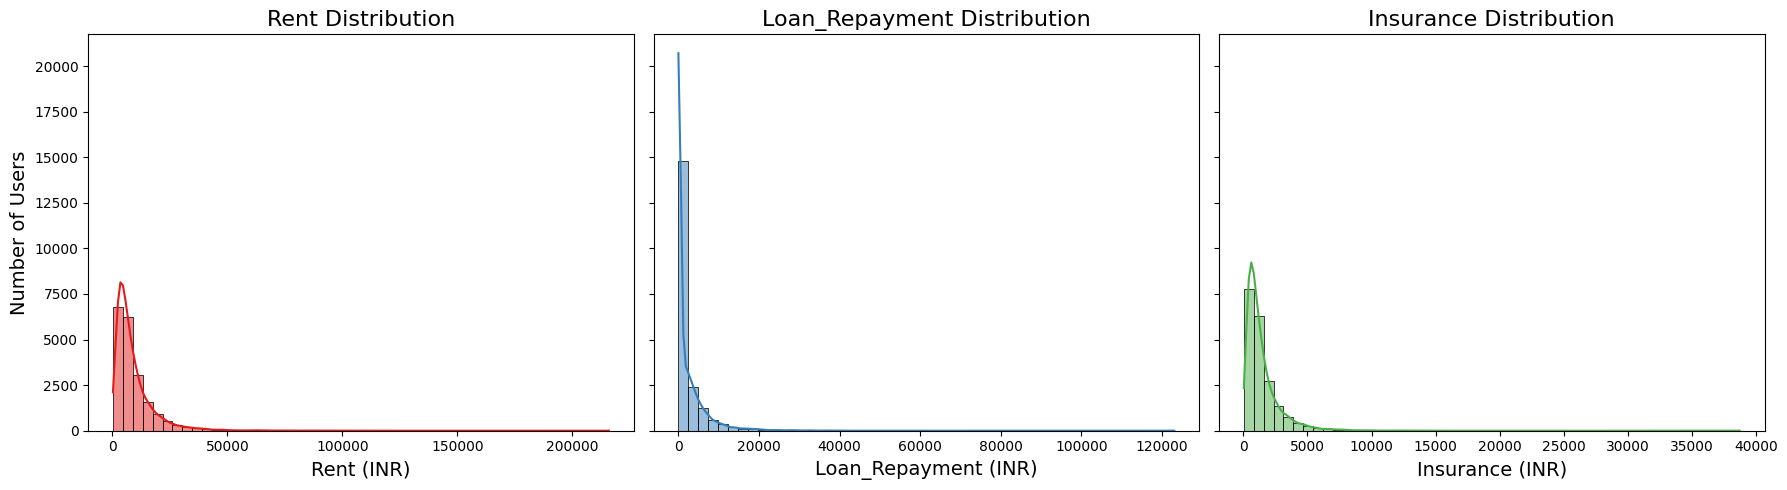

In [30]:
fixed_expenses = ['Rent', 'Loan_Repayment', 'Insurance']
num_fixed = len(fixed_expenses)

fixed_palette = sns.color_palette("Set1", num_fixed)

fig, axes = plt.subplots(1, num_fixed, figsize=(18, 5), sharey=True)

for ax, expense, color in zip(axes, fixed_expenses, fixed_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

## Variable Expenditure

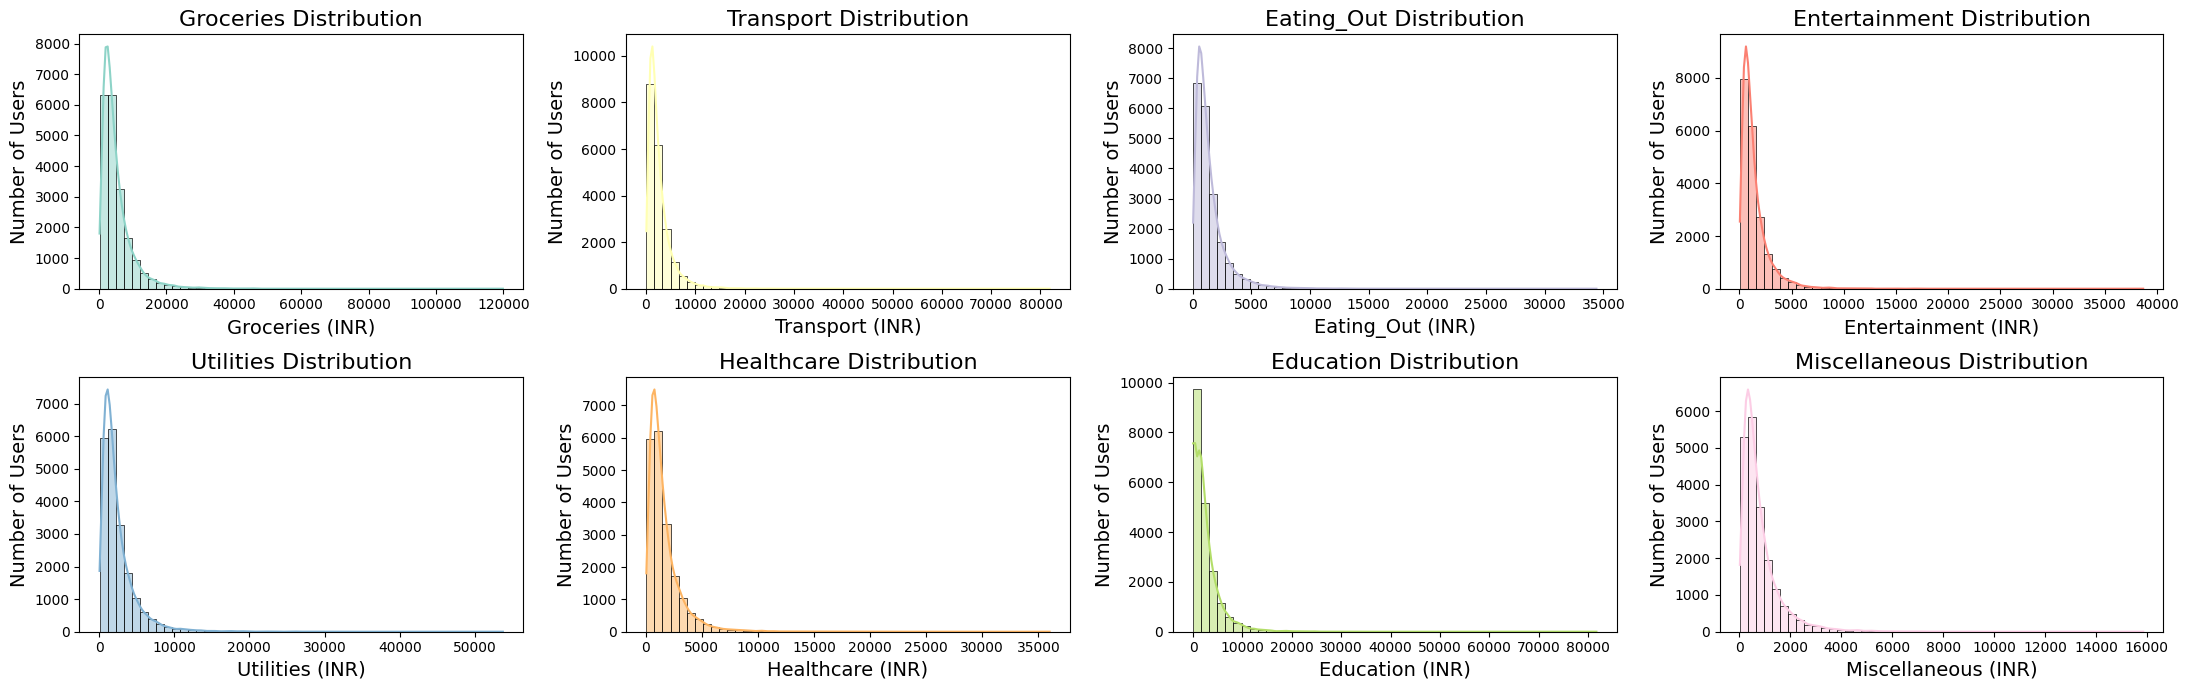

In [35]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]
num_variable = len(variable_expenses)

variable_palette = sns.color_palette("Set3", num_variable)

fig, axes = plt.subplots(2, 4, figsize=(22, 7))
axes = axes.flatten()

for ax, expense, color in zip(axes, variable_expenses, variable_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

# Savings Analysis

## Desired Savings VS Income

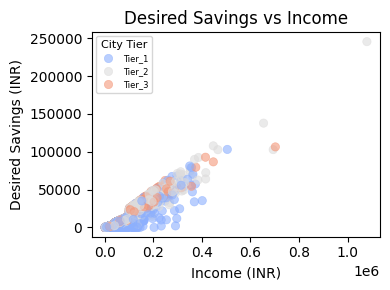

In [45]:
plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=df,
    x='Income',
    y='Desired_Savings',
    hue='City_Tier',
    palette='coolwarm',
    alpha=0.6,
    edgecolor=None
)
plt.title('Desired Savings vs Income', fontsize=12)
plt.xlabel('Income (INR)', fontsize=10)
plt.ylabel('Desired Savings (INR)', fontsize=10)
plt.legend(title='City Tier', fontsize=6, title_fontsize=8)
plt.tight_layout()
plt.show()

## Potential Savings Across Categories

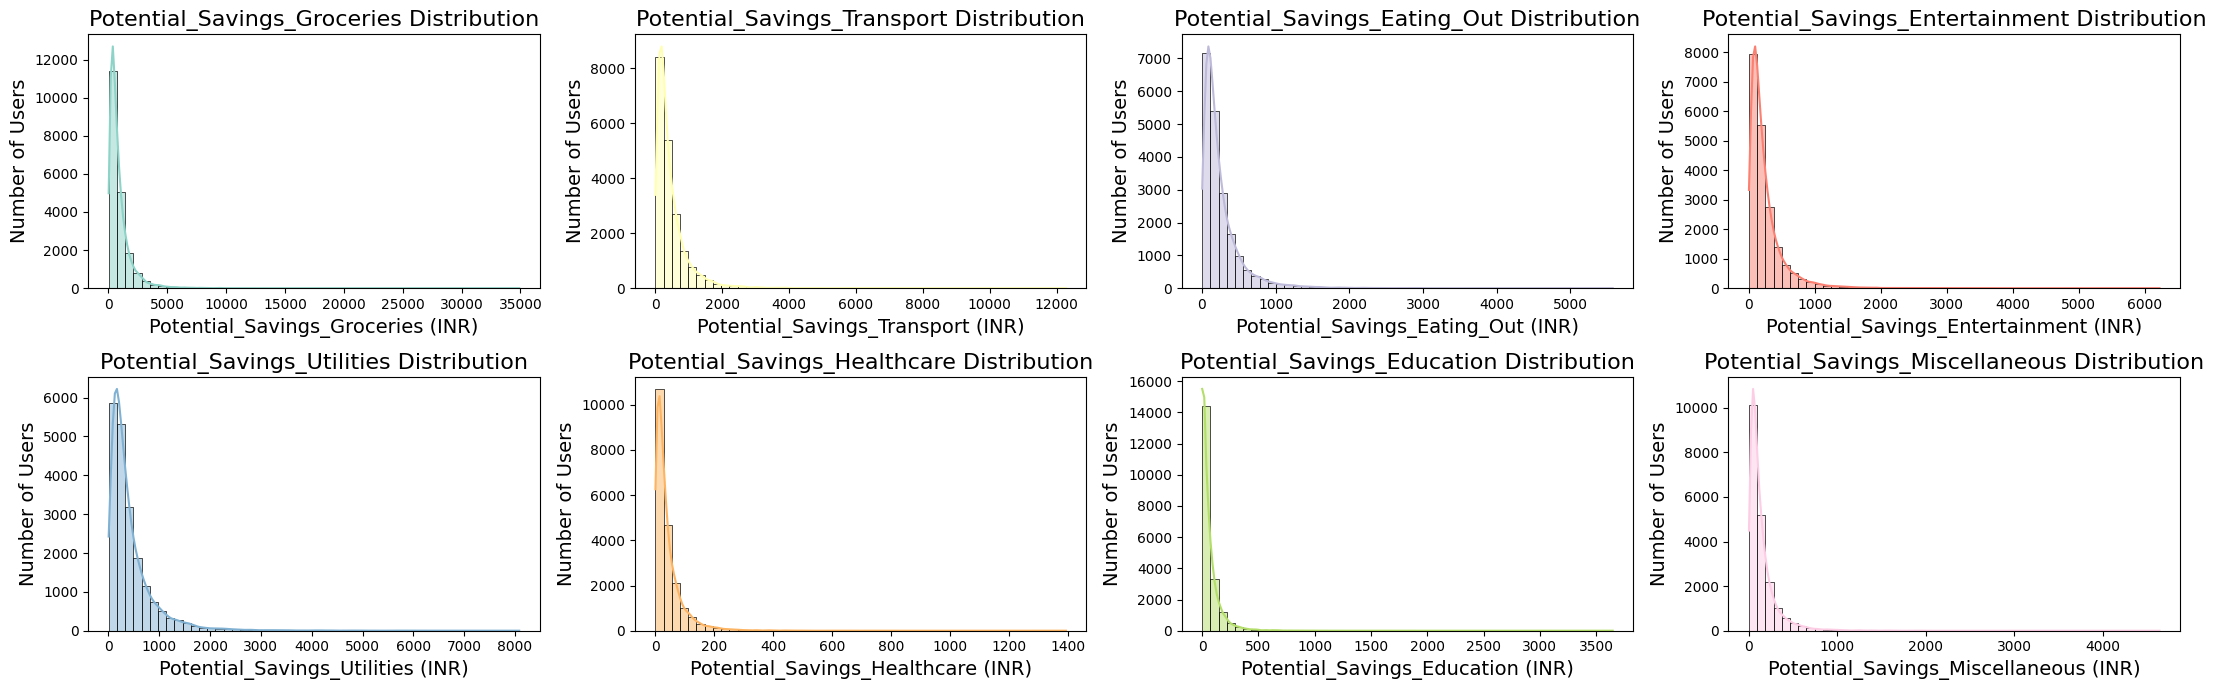

In [47]:
potential_savings_columns = [col for col in df.columns if col.startswith('Potential_Savings')]

num_potential = len(potential_savings_columns)
palette_potential = sns.color_palette("Set3", num_potential)

fig, axes = plt.subplots(2, 4, figsize=(22, 7))
axes = axes.flatten()

for ax, column, color in zip(axes, potential_savings_columns, palette_potential):
    sns.histplot(df[column], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{column} Distribution', fontsize=16)
    ax.set_xlabel(f'{column} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

# Correlation Analysis

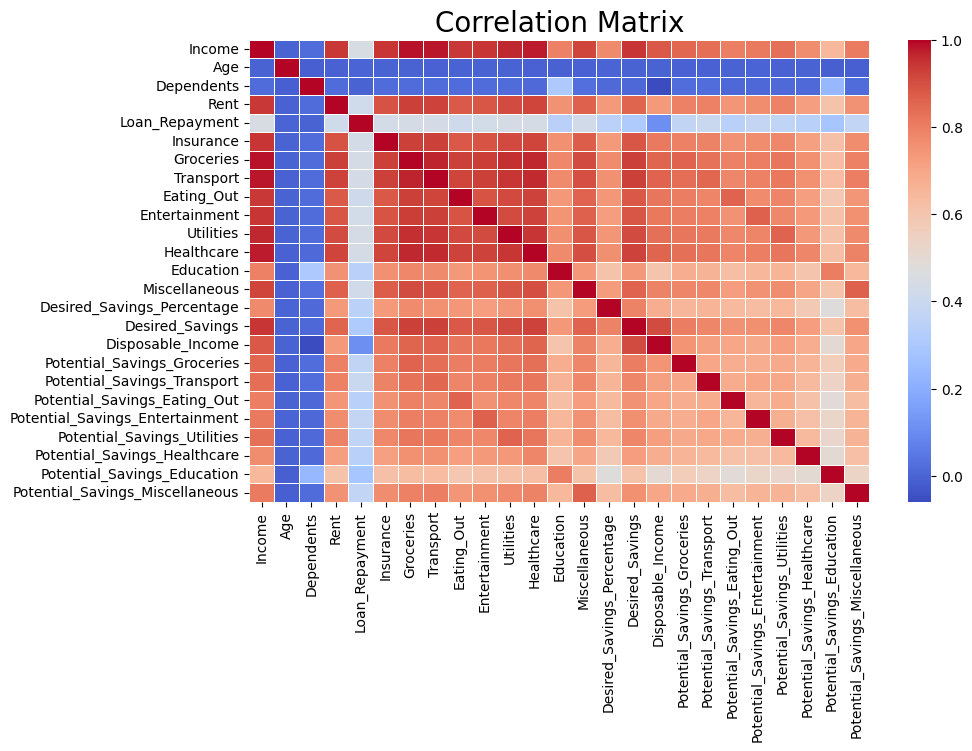

In [49]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

# Cluster based on Financial Profiles

In [51]:
financial_features = ['Income', 'Disposable_Income', 'Rent', 'Loan_Repayment']

financial_data = df[financial_features]
scaler = StandardScaler()
financial_data_scaled = scaler.fit_transform(financial_data)
inertia = []
for k in range(1, 11):  # Testing clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(financial_data_scaled)
    inertia.append(kmeans.inertia_)

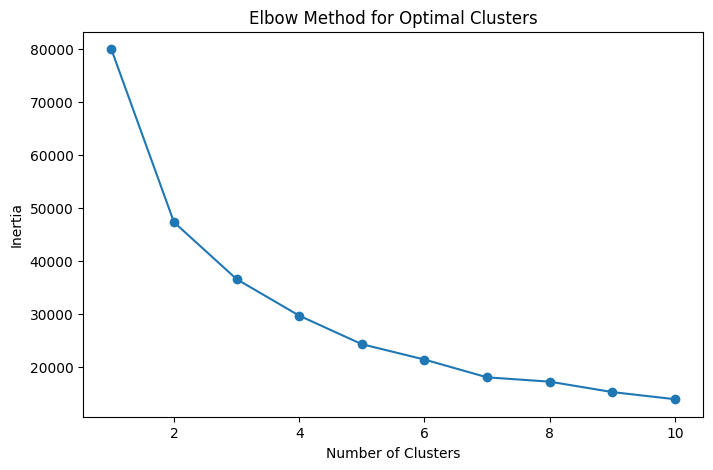

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [56]:
optimal_clusters = 4  

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Financial_Profile_Cluster'] = kmeans.fit_predict(financial_data_scaled)
cluster_summary = df.groupby('Financial_Profile_Cluster')[financial_features].mean()

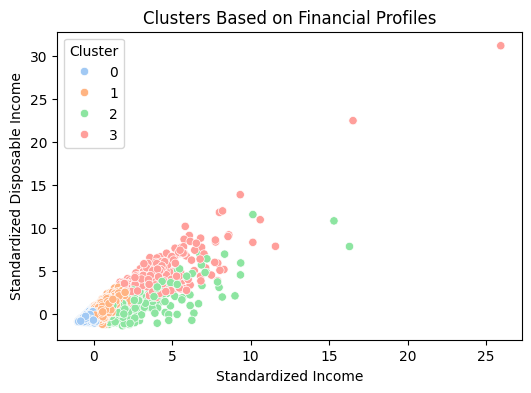

In [61]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=financial_data_scaled[:, 0], 
    y=financial_data_scaled[:, 1], 
    hue=df['Financial_Profile_Cluster'], 
    palette='pastel'
)
plt.title('Clusters Based on Financial Profiles')
plt.xlabel('Standardized Income')
plt.ylabel('Standardized Disposable Income')
plt.legend(title='Cluster')
plt.show()

In [62]:
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                                  Income  Disposable_Income          Rent  \
Financial_Profile_Cluster                                                   
0                           23020.139099        5824.075116   5026.090654   
1                           67136.454695       17910.779564  14779.358192   
2                          137471.347288       22213.529234  30426.382067   
3                          173518.054530       53111.932857  37668.073334   

                           Loan_Repayment  
Financial_Profile_Cluster                  
0                             1170.326791  
1                             2612.318166  
2                            19611.222086  
3                              643.700263  


# Risk Profiling

In [65]:
df['Savings'] = df['Disposable_Income'] - df['Rent'] - df['Loan_Repayment']
df['Debt_to_Income'] = df['Loan_Repayment'] / df['Income']
df['Rent_to_Income'] = df['Rent'] / df['Income']

def risk_profile(row):
    if row['Savings'] < 0 or row['Debt_to_Income'] > 0.4 or row['Rent_to_Income'] > 0.5:
        return 'Low Risk'
    elif row['Savings'] > 5000 and row['Debt_to_Income'] <= 0.4:
        return 'Moderate Risk'
    elif row['Savings'] > 20000 and row['Debt_to_Income'] <= 0.2:
        return 'High Risk'
    else:
        return 'Moderate Risk'

df['Risk_Profile'] = df.apply(risk_profile, axis=1)
risk_summary = df['Risk_Profile'].value_counts()
print("Risk Profile Summary:")
print(risk_summary)

Risk Profile Summary:
Risk_Profile
Low Risk         10271
Moderate Risk     9729
Name: count, dtype: int64


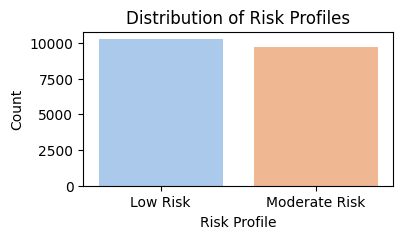

In [73]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='Risk_Profile', palette='pastel')
plt.title('Distribution of Risk Profiles')
plt.xlabel('Risk Profile')
plt.ylabel('Count')
plt.show()